In [4]:
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data_train, ds_info = tfds.load('cats_vs_dogs',split=[tfds.Split.TRAIN], with_info=True)

2023-05-26 10:05:37.650960: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]WARNING:absl:1738 images were corrupted and were skipped
                                                                        

Dataset cats_vs_dogs downloaded and prepared to /Users/zynkimland/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [6]:
import tensorflow_datasets as tfds

In [7]:
images = [one['image'] for one in data_train[0].take(30)]
len(images)

2023-05-26 10:27:59.512694: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [8]
	 [[{{node Placeholder/_4}}]]
2023-05-26 10:27:59.513066: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8]
	 [[{{node Placeholder/_0}}]]


30

(-0.5, 399.5, 299.5, -0.5)

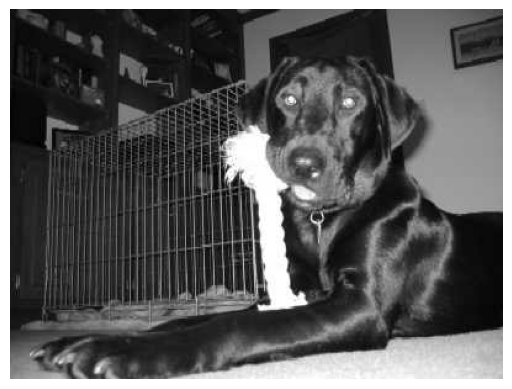

In [8]:
plt.imshow(images[20])
plt.axis('off')

In [11]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [12]:
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet',input_shape=(224,224,3))
resnet50_pre.summary()

102967424/102967424 [==============================] - 12s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                   

In [13]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [24]:
def pred_img(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  img_resized = cv2.resize(np.array(img),(224,224))
  pred = resnet50_pre.predict(img_resized.reshape([1,224,224,3]))
  decoded_pred = decode_predictions(pred)

  for i, instance in enumerate(decoded_pred[0]):
    # print('{}위:{}({:.2f}%)'.format(i+1, instance[1],instance[2]*100))
    print(i)
    print(instance[1],instance[2]*100)

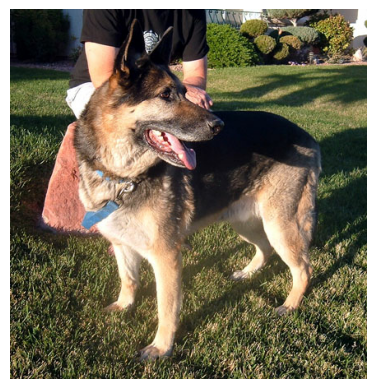

1/1 [==============================] - 0s 90ms/step
0
Norwegian_elkhound 74.02961254119873
1
Siberian_husky 16.852837800979614
2
schipperke 7.422100752592087
3
Eskimo_dog 0.4988370928913355
4
kelpie 0.3339978866279125


In [26]:
pred_img(images[28])